#**Multicollinearity!**
Multicollinearity occurs when two or more independent variables (features) in a regression model are highly correlated with each other.
##**Effects:**
1. Instability in estimates: Coefficients become sensitive to small changes in data.
2. Inflated variance: Standard errors of coefficients increase.
3. Difficulty in interpretation: Coefficients may not accurately represent relationships.
##**Causes:**
1. Correlated features: Features are highly related (e.g., age and experience).
2. Duplicate features: Features are identical or very similar.
3. Interaction terms: Including interaction terms between correlated features.
##**Consequences:**
1. Model instability: Small changes in data significantly affect coefficients.
2. Poor predictions: Model performance suffers due to inflated variance.
3. Misleading conclusions: Incorrect interpretations of coefficient significance.
##**Detection methods:**
1. Correlation matrix: Visualize correlations between features.
2. Variance Inflation Factor (VIF): Measure correlation between each feature and others.
3. Tolerance: Calculate 1 - R^2 for each feature.
##**Remedies:**
1. Feature selection: Remove highly correlated features.
2. Dimensionality reduction: Techniques like PCA, factor analysis.
3. Regularization: Lasso, Ridge regression to reduce coefficient magnitude.
4. Collect more data: Increase sample size to reduce correlation impact.
##**Real-world example:**
Suppose you're modeling house prices based on features like:
1. Number of bedrooms
2. Number of bathrooms
3. Square footage

These features might be highly correlated (multicollinear). Removing or combining redundant features can improve model stability and accuracy.

Correlation Matrix:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.04939

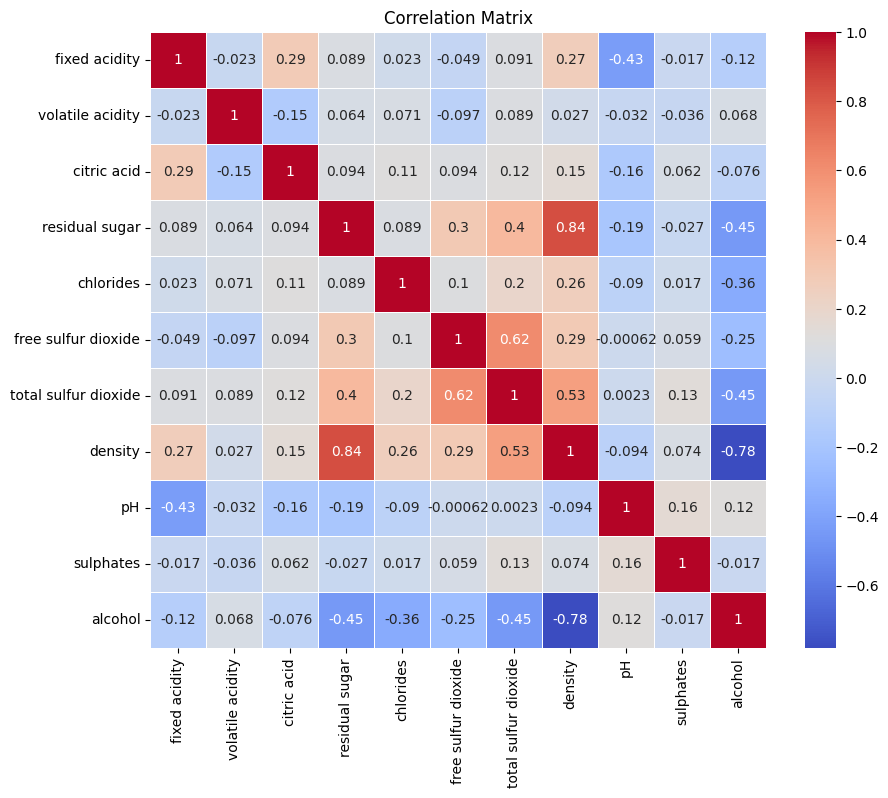


VIF:
     VIF Factor              features
0     92.861483         fixed acidity
1      9.730569      volatile acidity
2     10.007114           citric acid
3      3.830272        residual sugar
4      6.497448             chlorides
5      9.261556   free sulfur dioxide
6     24.980802  total sulfur dioxide
7   1056.497431               density
8    609.861725                    pH
9     20.527123             sulphates
10   118.707368               alcohol

Tolerance:
    Tolerance              Features
0    0.010769         fixed acidity
1    0.102769      volatile acidity
2    0.099929           citric acid
3    0.261078        residual sugar
4    0.153907             chlorides
5    0.107973   free sulfur dioxide
6    0.040031  total sulfur dioxide
7    0.000947               density
8    0.001640                    pH
9    0.048716             sulphates
10   0.008424               alcohol

Features to remove:
['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free s

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Load Wine Quality dataset
wine_url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/winequality-white.csv"
df = pd.read_csv(wine_url, sep=',')


# Preprocess data
df['quality'] = (df['quality'] > 6).astype(int)


# Define target variable
y = df['quality']
X = df.drop('quality', axis=1)


# Correlation matrix
corr_matrix = X.corr()
print("Correlation Matrix:")
print(corr_matrix)


# Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    square=True,
    linewidths=0.5
)
plt.title('Correlation Matrix')
plt.show()


# VIF calculation
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print("\nVIF:")
print(vif)


# Tolerance calculation
tolerance = 1 / vif["VIF Factor"]
print("\nTolerance:")
print(pd.DataFrame({"Tolerance": tolerance, "Features": X.columns}))


# Remove features with high VIF (>5)
to_remove = vif[vif["VIF Factor"] > 5]["features"].tolist()
print("\nFeatures to remove:")
print(to_remove)


# Remove features
X_updated = X.drop(to_remove, axis=1)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_updated, y, test_size=0.2, random_state=42)


# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
print("\nLasso Coefficients:")
print(lasso.coef_)


# Ridge regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
print("\nRidge Coefficients:")
print(ridge.coef_)


# Evaluate models
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_lasso = (y_pred_lasso > 0.5).astype(int)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_ridge = (y_pred_ridge > 0.5).astype(int)

print("\nLasso Accuracy:", accuracy_score(y_test, y_pred_lasso))
print("Ridge Accuracy:", accuracy_score(y_test, y_pred_ridge))

Correlation Matrix:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.04939

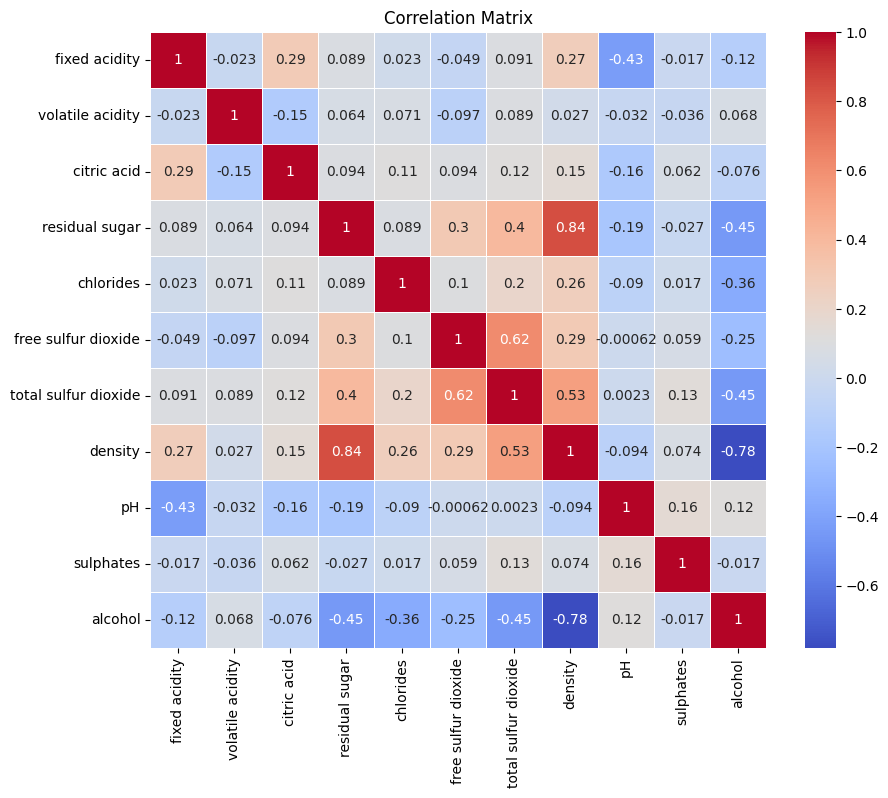


VIF:
     VIF Factor              features
0     92.861483         fixed acidity
1      9.730569      volatile acidity
2     10.007114           citric acid
3      3.830272        residual sugar
4      6.497448             chlorides
5      9.261556   free sulfur dioxide
6     24.980802  total sulfur dioxide
7   1056.497431               density
8    609.861725                    pH
9     20.527123             sulphates
10   118.707368               alcohol

Tolerance:
    Tolerance              Features
0    0.010769         fixed acidity
1    0.102769      volatile acidity
2    0.099929           citric acid
3    0.261078        residual sugar
4    0.153907             chlorides
5    0.107973   free sulfur dioxide
6    0.040031  total sulfur dioxide
7    0.000947               density
8    0.001640                    pH
9    0.048716             sulphates
10   0.008424               alcohol

Features to remove:
['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free s

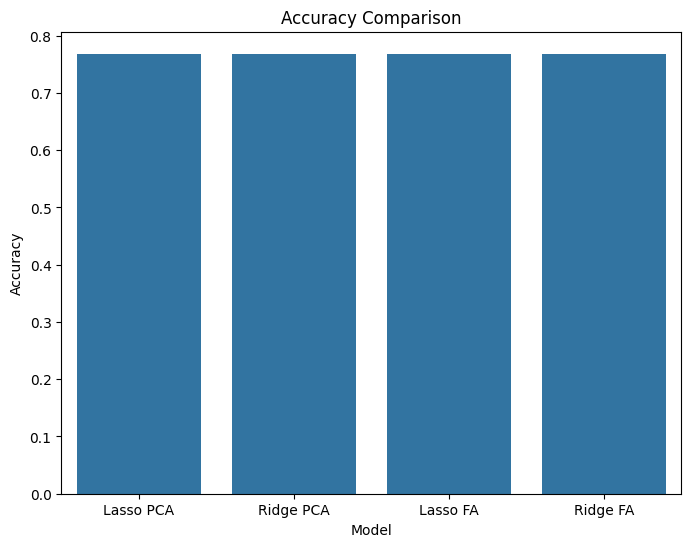

In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
#from sklearn.factor_analysis import FactorAnalysis
from sklearn.decomposition import FactorAnalysis


# Load Wine Quality dataset
wine_url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/winequality-white.csv"
df = pd.read_csv(wine_url, sep=',')


# Preprocess data
df['quality'] = (df['quality'] > 6).astype(int)


# Define target variable
y = df['quality']
X = df.drop('quality', axis=1)


# Correlation matrix
corr_matrix = X.corr()
print("Correlation Matrix:")
print(corr_matrix)


# Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    square=True,
    linewidths=0.5
)
plt.title('Correlation Matrix')
plt.show()


# VIF calculation
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print("\nVIF:")
print(vif)


# Tolerance calculation
tolerance = 1 / vif["VIF Factor"]
print("\nTolerance:")
print(pd.DataFrame({"Tolerance": tolerance, "Features": X.columns}))


# Remove features with high VIF (>5)
to_remove = vif[vif["VIF Factor"] > 5]["features"].tolist()
print("\nFeatures to remove:")
print(to_remove)


# Remove features
X_updated = X.drop(to_remove, axis=1)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_updated, y, test_size=0.2, random_state=42)


# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# PCA (95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("\nPCA Components:")
print(pca.components_)


# Factor Analysis (3 factors)
fa = FactorAnalysis(n_components=3)
X_train_fa = fa.fit_transform(X_train_scaled)
X_test_fa = fa.transform(X_test_scaled)
print("\nFactor Analysis Components:")
print(fa.components_)


# Lasso regression (PCA)
lasso_pca = Lasso(alpha=0.1)
lasso_pca.fit(X_train_pca, y_train)
print("\nLasso PCA Coefficients:")
print(lasso_pca.coef_)


# Ridge regression (PCA)
ridge_pca = Ridge(alpha=0.1)
ridge_pca.fit(X_train_pca, y_train)
print("\nRidge PCA Coefficients:")
print(ridge_pca.coef_)


# Lasso regression (Factor Analysis)
lasso_fa = Lasso(alpha=0.1)
lasso_fa.fit(X_train_fa, y_train)
print("\nLasso FA Coefficients:")
print(lasso_fa.coef_)


# Ridge regression (Factor Analysis)
ridge_fa = Ridge(alpha=0.1)
ridge_fa.fit(X_train_fa, y_train)
print("\nRidge FA Coefficients:")
print(ridge_fa.coef_)


# Evaluate models
y_pred_lasso_pca = lasso_pca.predict(X_test_pca)
y_pred_lasso_pca = (y_pred_lasso_pca > 0.5).astype(int)
y_pred_ridge_pca = ridge_pca.predict(X_test_pca)
y_pred_ridge_pca = (y_pred_ridge_pca > 0.5).astype(int)

y_pred_lasso_fa = lasso_fa.predict(X_test_fa)
y_pred_lasso_fa = (y_pred_lasso_fa > 0.5).astype(int)
y_pred_ridge_fa = ridge_fa.predict(X_test_fa)
y_pred_ridge_fa = (y_pred_ridge_fa > 0.5).astype(int)

print("\nLasso PCA Accuracy:", accuracy_score(y_test, y_pred_lasso_pca))
print("Ridge PCA Accuracy:", accuracy_score(y_test, y_pred_ridge_pca))
print("Lasso FA Accuracy:", accuracy_score(y_test, y_pred_lasso_fa))
print("Lasso PCA Accuracy:", accuracy_score(y_test, y_pred_lasso_pca))
print("Ridge PCA Accuracy:", accuracy_score(y_test, y_pred_ridge_pca))
print("Lasso FA Accuracy:", accuracy_score(y_test, y_pred_lasso_fa))
print("Ridge FA Accuracy:", accuracy_score(y_test, y_pred_ridge_fa))


# Compare accuracy
accuracy_df = pd.DataFrame({
    'Model': ['Lasso PCA', 'Ridge PCA', 'Lasso FA', 'Ridge FA'],
    'Accuracy': [accuracy_score(y_test, y_pred_lasso_pca),
                 accuracy_score(y_test, y_pred_ridge_pca),
                 accuracy_score(y_test, y_pred_lasso_fa),
                 accuracy_score(y_test, y_pred_ridge_fa)]
})
print("\nAccuracy Comparison:")
print(accuracy_df)


# Plot accuracy comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()